In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer


from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, precision_recall_fscore_support, \
    roc_curve, auc, precision_recall_curve, average_precision_score

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy







In [2]:
df= pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.xls')
print(df.head())



   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [3]:
df.shape[0]
print(f'Number 0f rows:', df.shape[0])
df.shape[1]
print(f'Number 0f Columns:', df.shape[1])

Number 0f rows: 7043
Number 0f Columns: 21


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df['TotalCharges']= pd.to_numeric(df['TotalCharges'], errors='coerce').fillna(0).astype(int)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151,Yes


In [6]:
# Numerical values of the dataset
df.describe(include=['int', 'float'])

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.265086
std,0.368612,24.559481,30.090047,2266.790864
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.000000
50%,0.000000,29.000000,70.350000,1394.000000
75%,0.000000,55.000000,89.850000,3786.500000
max,1.000000,72.000000,118.750000,8684.000000


In [7]:
# Description of Non-Numerical Values
df.describe(include=['object'])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [8]:
# Data Cleaning: SeniorCitizen#
#-warnings.filterwarnings('ignore')-#

df['SeniorCitizen'].replace({0:'No', 1:'Yes'}, inplace=True)
df['SeniorCitizen'].value_counts()

,count
SeniorCitizen,
No,5901
Yes,1142


In [9]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151,Yes


Text(0.5, 1.0, 'Churn Overview Percentage')

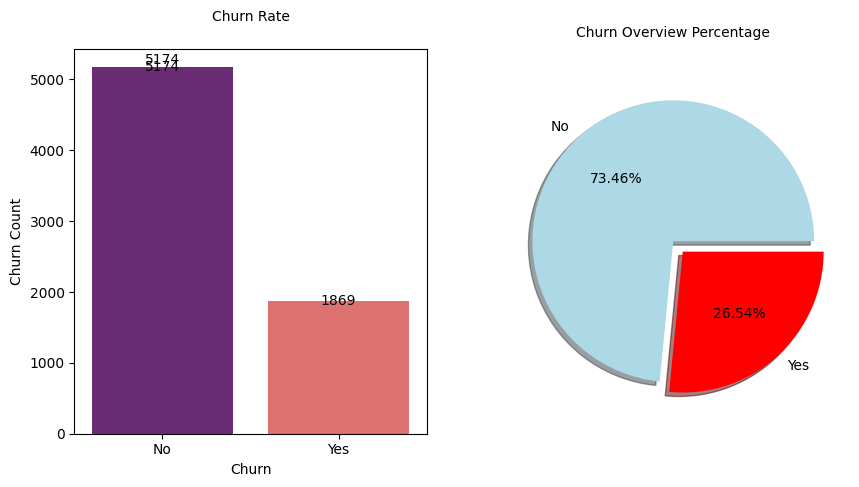

In [10]:

# Exploratory Data Analysis (EDA)

plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)

# count plot on single categorical variable
ax =sns.countplot(data=df, x='Churn', palette='magma')
plt.title('Churn Rate', pad=20, fontsize=10, fontweight=20)
plt.xlabel('Churn')
plt.ylabel('Churn Count')
ax.bar_label(ax.containers[0])
for p in ax.patches:
      ax.annotate(f'{int(p.get_height())}',(p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center')

plt.subplot(1,2,2)
Churn_counts = df['Churn'].value_counts()
plt.pie(Churn_counts,
       labels= Churn_counts.index,
       autopct='%.2f%%',
       colors=['lightblue', 'Red'],
       explode=[0, 0.1],
       shadow= True)
plt.title('Churn Overview Percentage', pad=20, fontsize=10, fontweight=20)

In [11]:
#Analysis of Numeric Feature

Numeric_feature = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
Numeric_feature

['tenure', 'MonthlyCharges', 'TotalCharges']

In [12]:
def numerical_visualizations(cols):
        plt.figure(figsize=(17,6))
        plt.subplot(1,2,1)
        sns.kdeplot(data=df, x=col, hue='Churn', palette='viridis')
        plt.title(f'Distribution of {cols}', pad= 10, fontsize=10, fontweight=20)

        plt.subplot(1,2,2)
        ax= sns.barplot(data=df, y=cols, x='Churn', estimator=np.mean, ci= None, palette='viridis')
        plt.title(f'Average {cols} Vs Churn', pad=10, fontsize=10, fontweight=20)
        ax.bar_label(ax.containers[0], fmt='%.2f')
        plt.tight_layout()
        plt.show()



In [13]:
#Analysis of Numeric Feature

Numeric_feature = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
Numeric_feature

['tenure', 'MonthlyCharges', 'TotalCharges']

In [ ]:
for col in Numeric_feature:
    numerical_visualizations(cols)

In [ ]:
#def categorical_features_summary(df):
     cats_cols = df.select.dtypes(exclude='numbers')
     uni_values=[]
     counts= []
     pct= []

     for cols in cats_cols.columns:
          uni_value, count = np.unique(np.array(cats_cols[cols].dtype(str)), return_counts=True)
          uni_values.append(uni_value)
          counts.append[count]
          pct = round(count/count.sum()*100, 2)
```
#def categorical_features_summary(df):
     cats_cols = df.select_dtypes(exclude='number')
     uni_values=[]
     counts= []
     pct= []

     for cols in cats_cols.columns:
          uni_value, count = np.unique(np.array(cats_cols[cols].astype(str)), return_counts=True)
          uni_values.append(uni_value)
          counts.append(count)
          pct.append(round(count/count.sum()*100, 2))


     return pd.DataFrame({'dtypes': cats_cols.dtypes,
                       'unique_values': uni_values,
                       'counts': [len(val) for val in uni_values],
                       'value_counts': count,
                       'pct': pct})


In [15]:
def categorical_features_summary(df):
     cats_cols = df.select_dtypes(exclude='number')
     uni_values=[]
     counts= []
     pct= []


     for cols in cats_cols.columns:
          uni_value, count = np.unique(np.array(cats_cols[cols].astype(str)), return_counts=True)
          uni_values.append(uni_value)
          counts.append(count)
          pct.append(np.round(count/count.sum()*100, 2))


     return pd.DataFrame({'dtypes': cats_cols.dtypes,
                       'unique_values': uni_values,
                       'counts': [len(val) for val in uni_values],
                       'value_counts': counts,
                       'pct': pct})

In [16]:
categorical_features_summary(df.drop('customerID', axis=1))


,dtypes,unique_values,counts,value_counts,pct
gender,object,"[Female, Male]",2,"[3488, 3555]","[49.52, 50.48]"
SeniorCitizen,object,"[No, Yes]",2,"[5901, 1142]","[83.79, 16.21]"
Partner,object,"[No, Yes]",2,"[3641, 3402]","[51.7, 48.3]"
Dependents,object,"[No, Yes]",2,"[4933, 2110]","[70.04, 29.96]"
PhoneService,object,"[No, Yes]",2,"[682, 6361]","[9.68, 90.32]"
MultipleLines,object,"[No, No phone service, Yes]",3,"[3390, 682, 2971]","[48.13, 9.68, 42.18]"
InternetService,object,"[DSL, Fiber optic, No]",3,"[2421, 3096, 1526]","[34.37, 43.96, 21.67]"
OnlineSecurity,object,"[No, No internet service, Yes]",3,"[3498, 1526, 2019]","[49.67, 21.67, 28.67]"
OnlineBackup,object,"[No, No internet service, Yes]",3,"[3088, 1526, 2429]","[43.84, 21.67, 34.49]"
DeviceProtection,object,"[No, No internet service, Yes]",3,"[3095, 1526, 2422]","[43.94, 21.67, 34.39]"


In [17]:
categorical_features_summary(df.drop(columns=['customerID']))

,dtypes,unique_values,counts,value_counts,pct
gender,object,"[Female, Male]",2,"[3488, 3555]","[49.52, 50.48]"
SeniorCitizen,object,"[No, Yes]",2,"[5901, 1142]","[83.79, 16.21]"
Partner,object,"[No, Yes]",2,"[3641, 3402]","[51.7, 48.3]"
Dependents,object,"[No, Yes]",2,"[4933, 2110]","[70.04, 29.96]"
PhoneService,object,"[No, Yes]",2,"[682, 6361]","[9.68, 90.32]"
MultipleLines,object,"[No, No phone service, Yes]",3,"[3390, 682, 2971]","[48.13, 9.68, 42.18]"
InternetService,object,"[DSL, Fiber optic, No]",3,"[2421, 3096, 1526]","[34.37, 43.96, 21.67]"
OnlineSecurity,object,"[No, No internet service, Yes]",3,"[3498, 1526, 2019]","[49.67, 21.67, 28.67]"
OnlineBackup,object,"[No, No internet service, Yes]",3,"[3088, 1526, 2429]","[43.84, 21.67, 34.49]"
DeviceProtection,object,"[No, No internet service, Yes]",3,"[3095, 1526, 2422]","[43.94, 21.67, 34.39]"


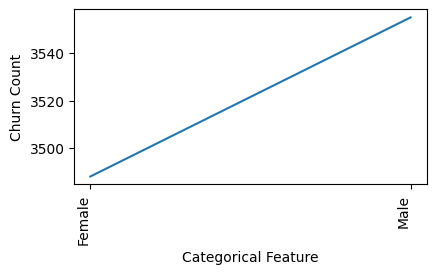

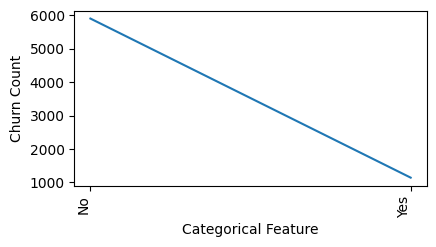

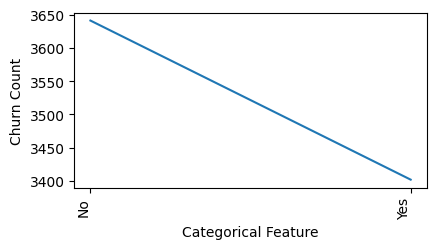

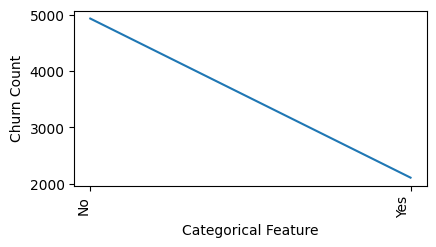

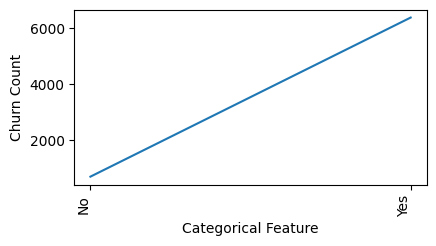

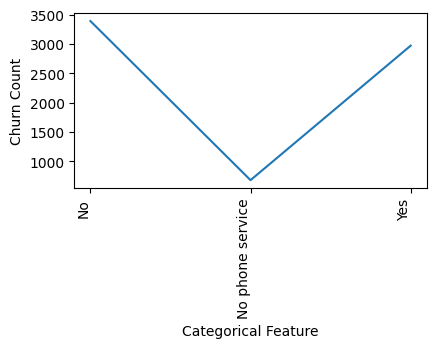

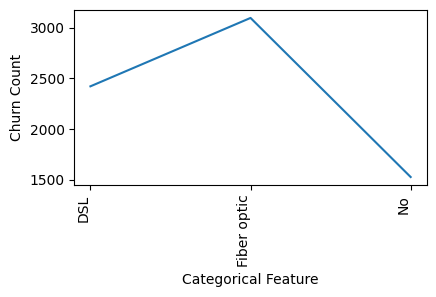

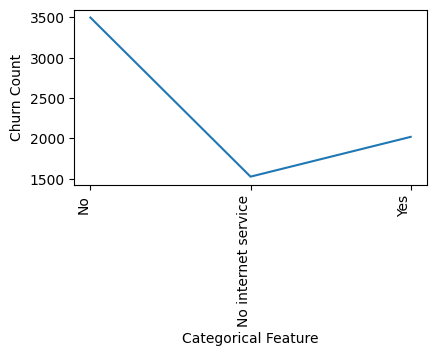

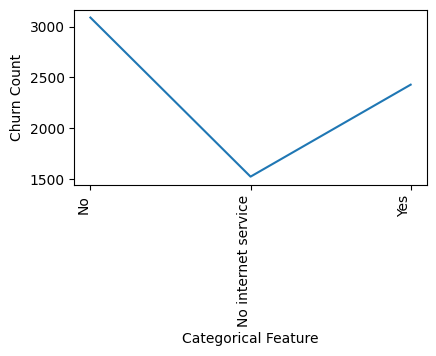

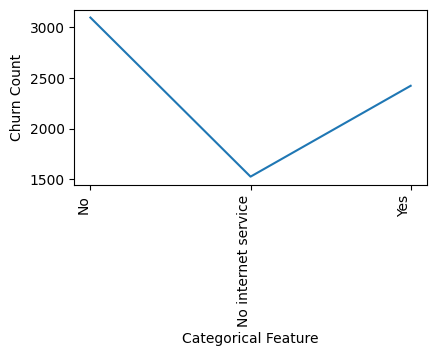

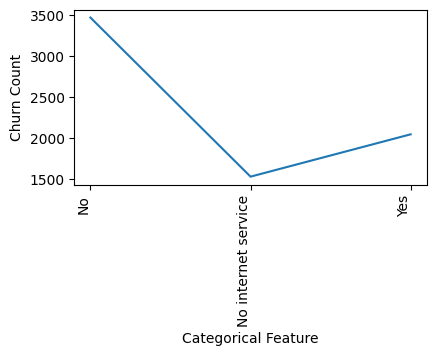

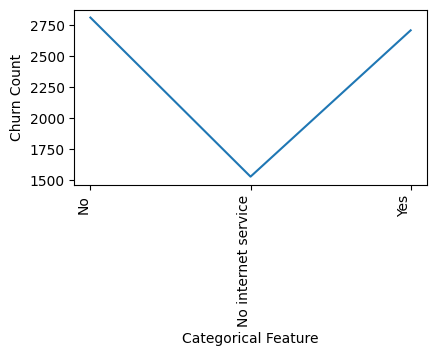

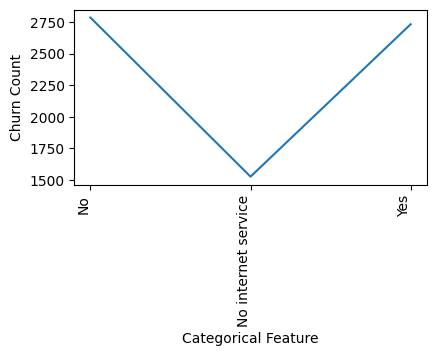

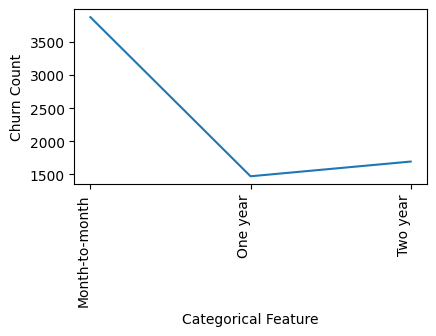

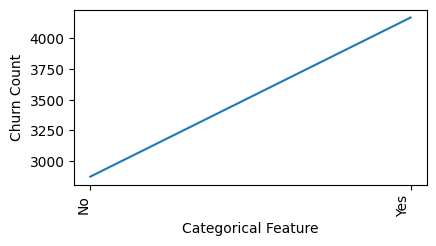

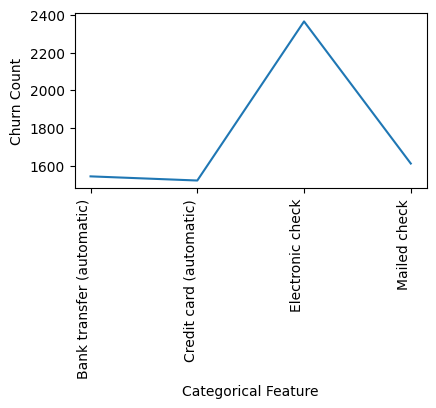

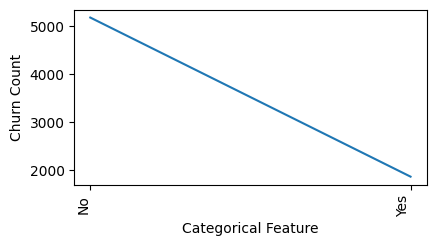

In [18]:
summary_df =categorical_features_summary(df.drop(columns=['customerID']))
for i in range(len(summary_df)):
    unique_values= summary_df['unique_values'][i]
    value_counts= summary_df['value_counts'][i]
    pct= summary_df['pct'][i]

    plt.figure(figsize=(10,5))
    plt.subplot(2,2,2)
    plt.plot(unique_values, value_counts)
    plt.xlabel('Categorical Feature')
    plt.ylabel('Churn Count')
    plt.xticks(rotation='vertical', ha= 'right')
    ax.bar_label(ax.containers[0])
    plt.show()

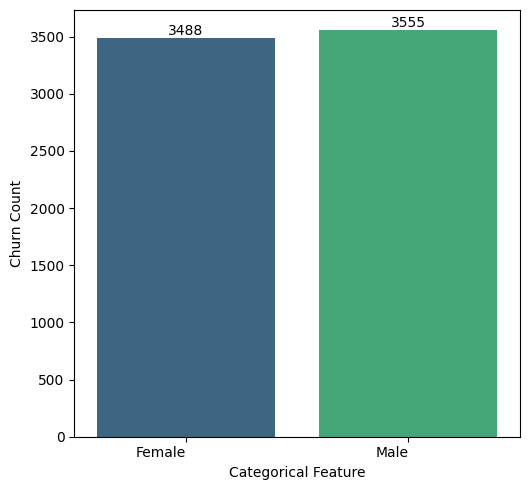

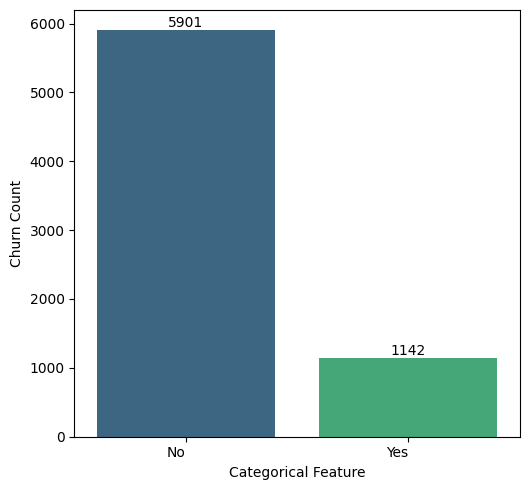

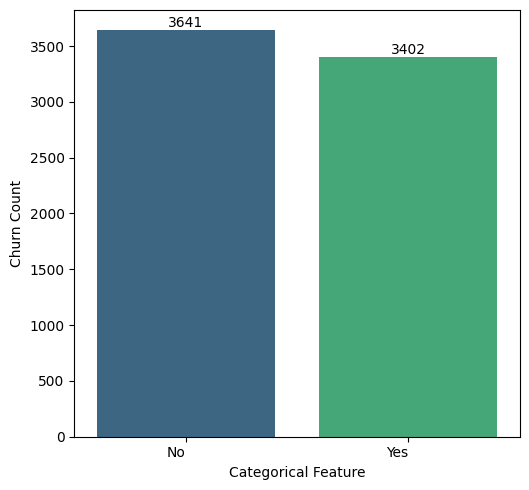

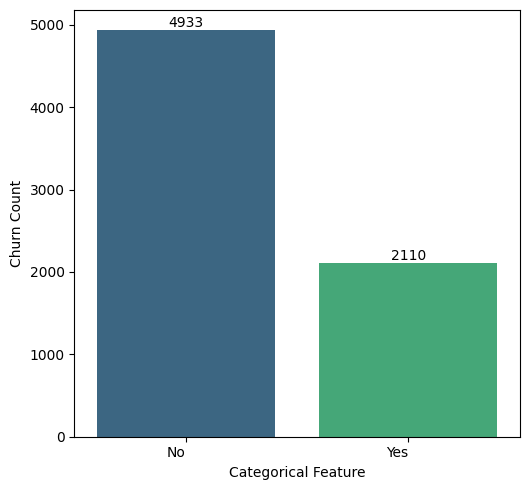

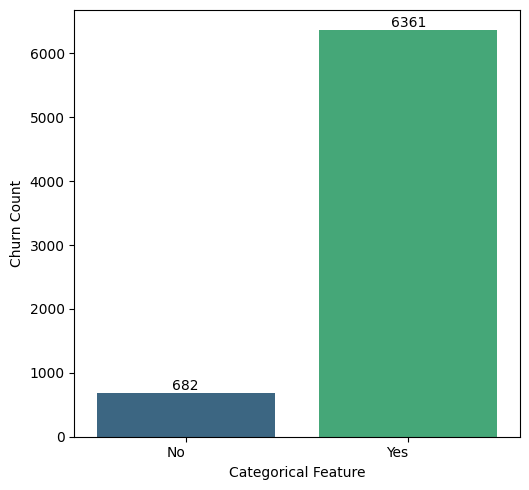

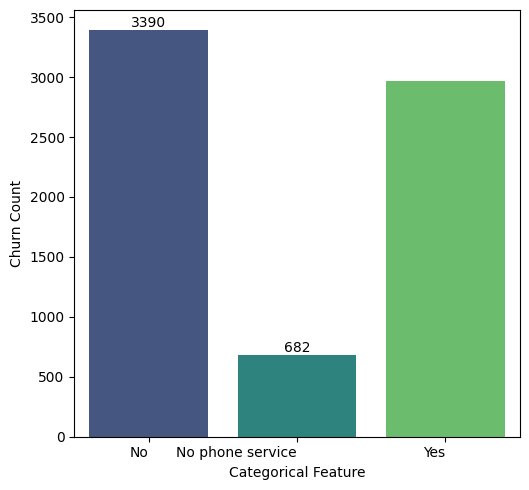

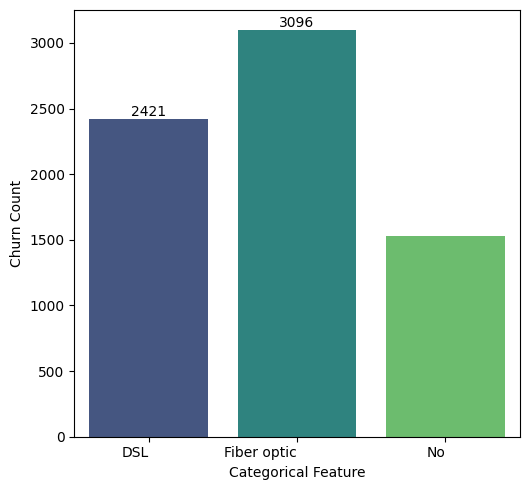

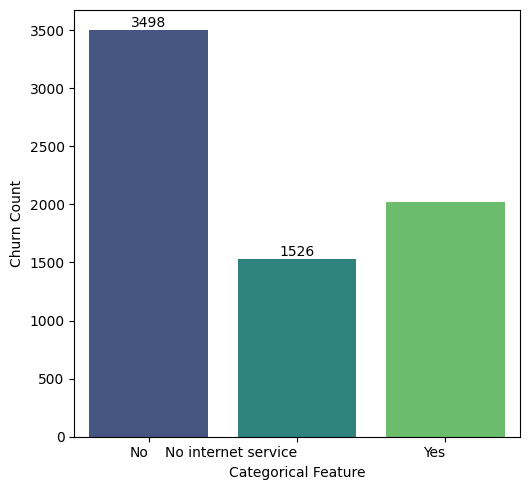

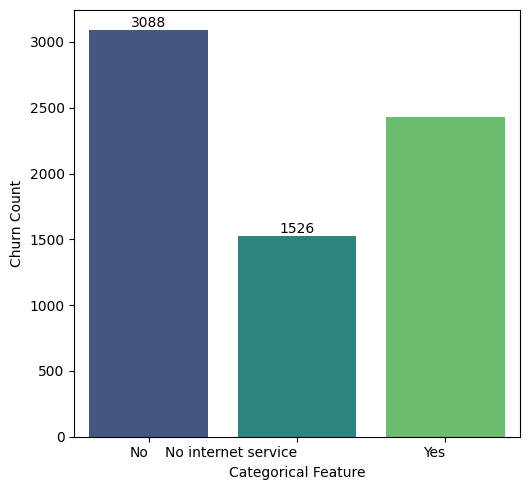

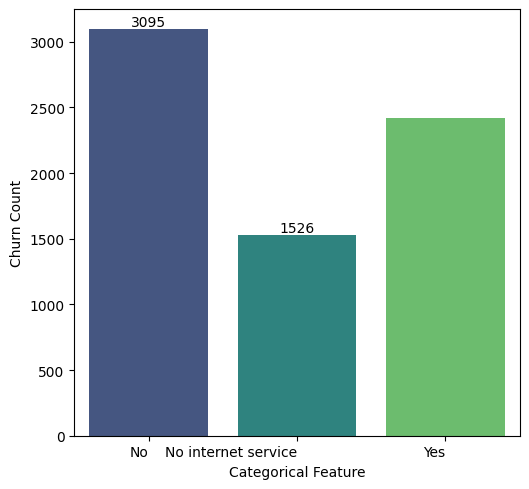

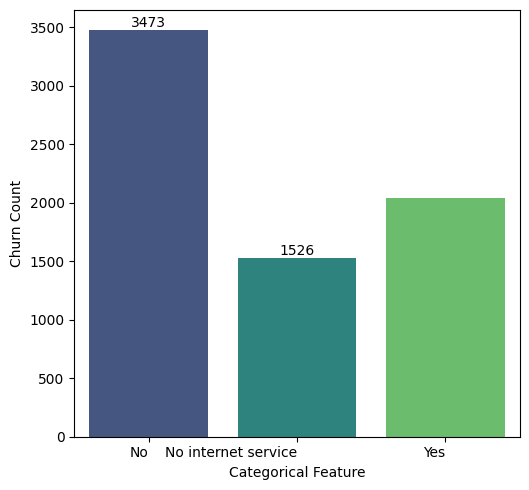

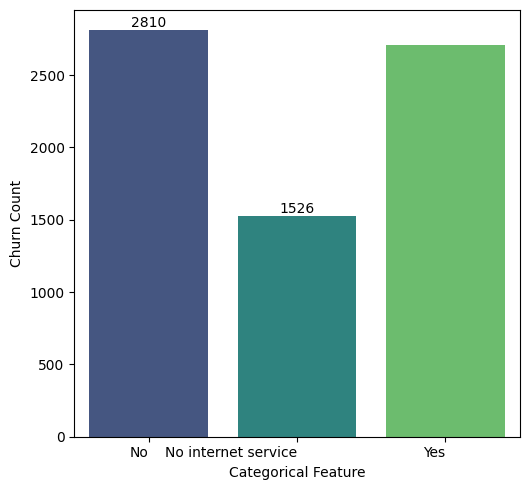

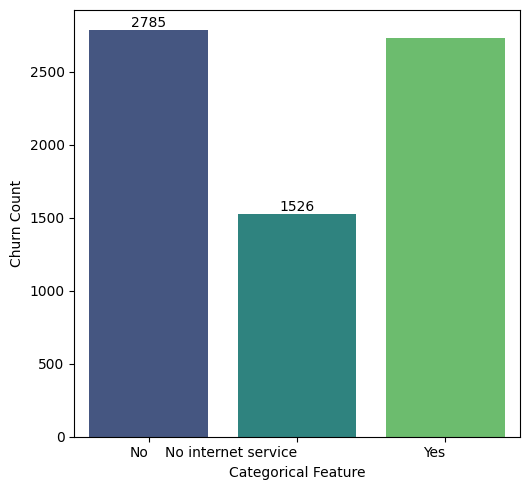

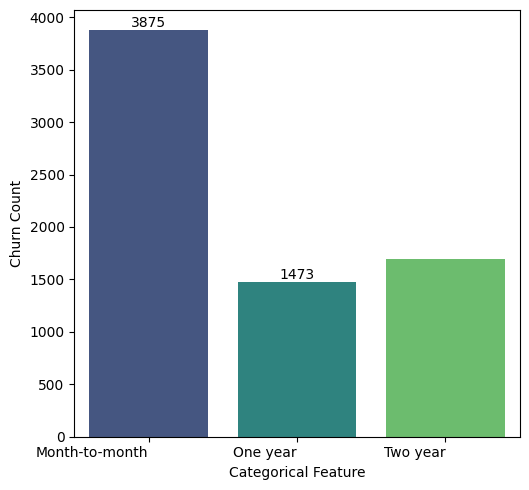

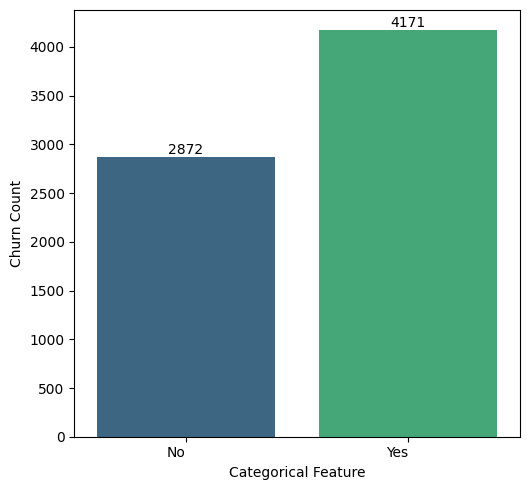

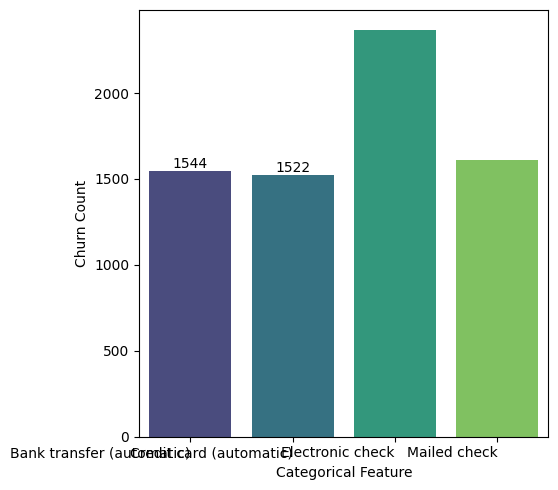

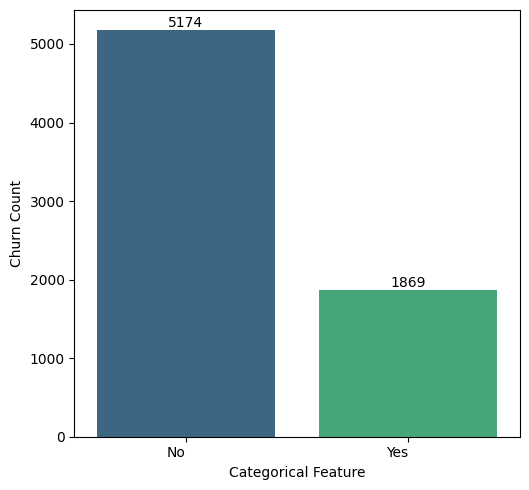

In [19]:
summary_df =categorical_features_summary(df.drop(columns=['customerID']))
for i in range(len(summary_df)):
    unique_values= summary_df['unique_values'][i]
    value_counts= summary_df['value_counts'][i]
    pct= summary_df['pct'][i]

    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    ax= sns.barplot(x=unique_values, y=value_counts, palette='viridis')
    plt.xlabel('Categorical Feature')
    plt.ylabel('Churn Count')
    plt.xticks(rotation='horizontal', ha= 'right')
    #for p in ax.patches:
        #ax.annotate(f'{int(p.get_height())}',(p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center')
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
    plt.tight_layout()
    plt.show()

In [20]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [21]:
category_column =df.select_dtypes(include='object').columns.tolist()
category_column.remove('customerID')
category_column.remove('Churn')
category_column


['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

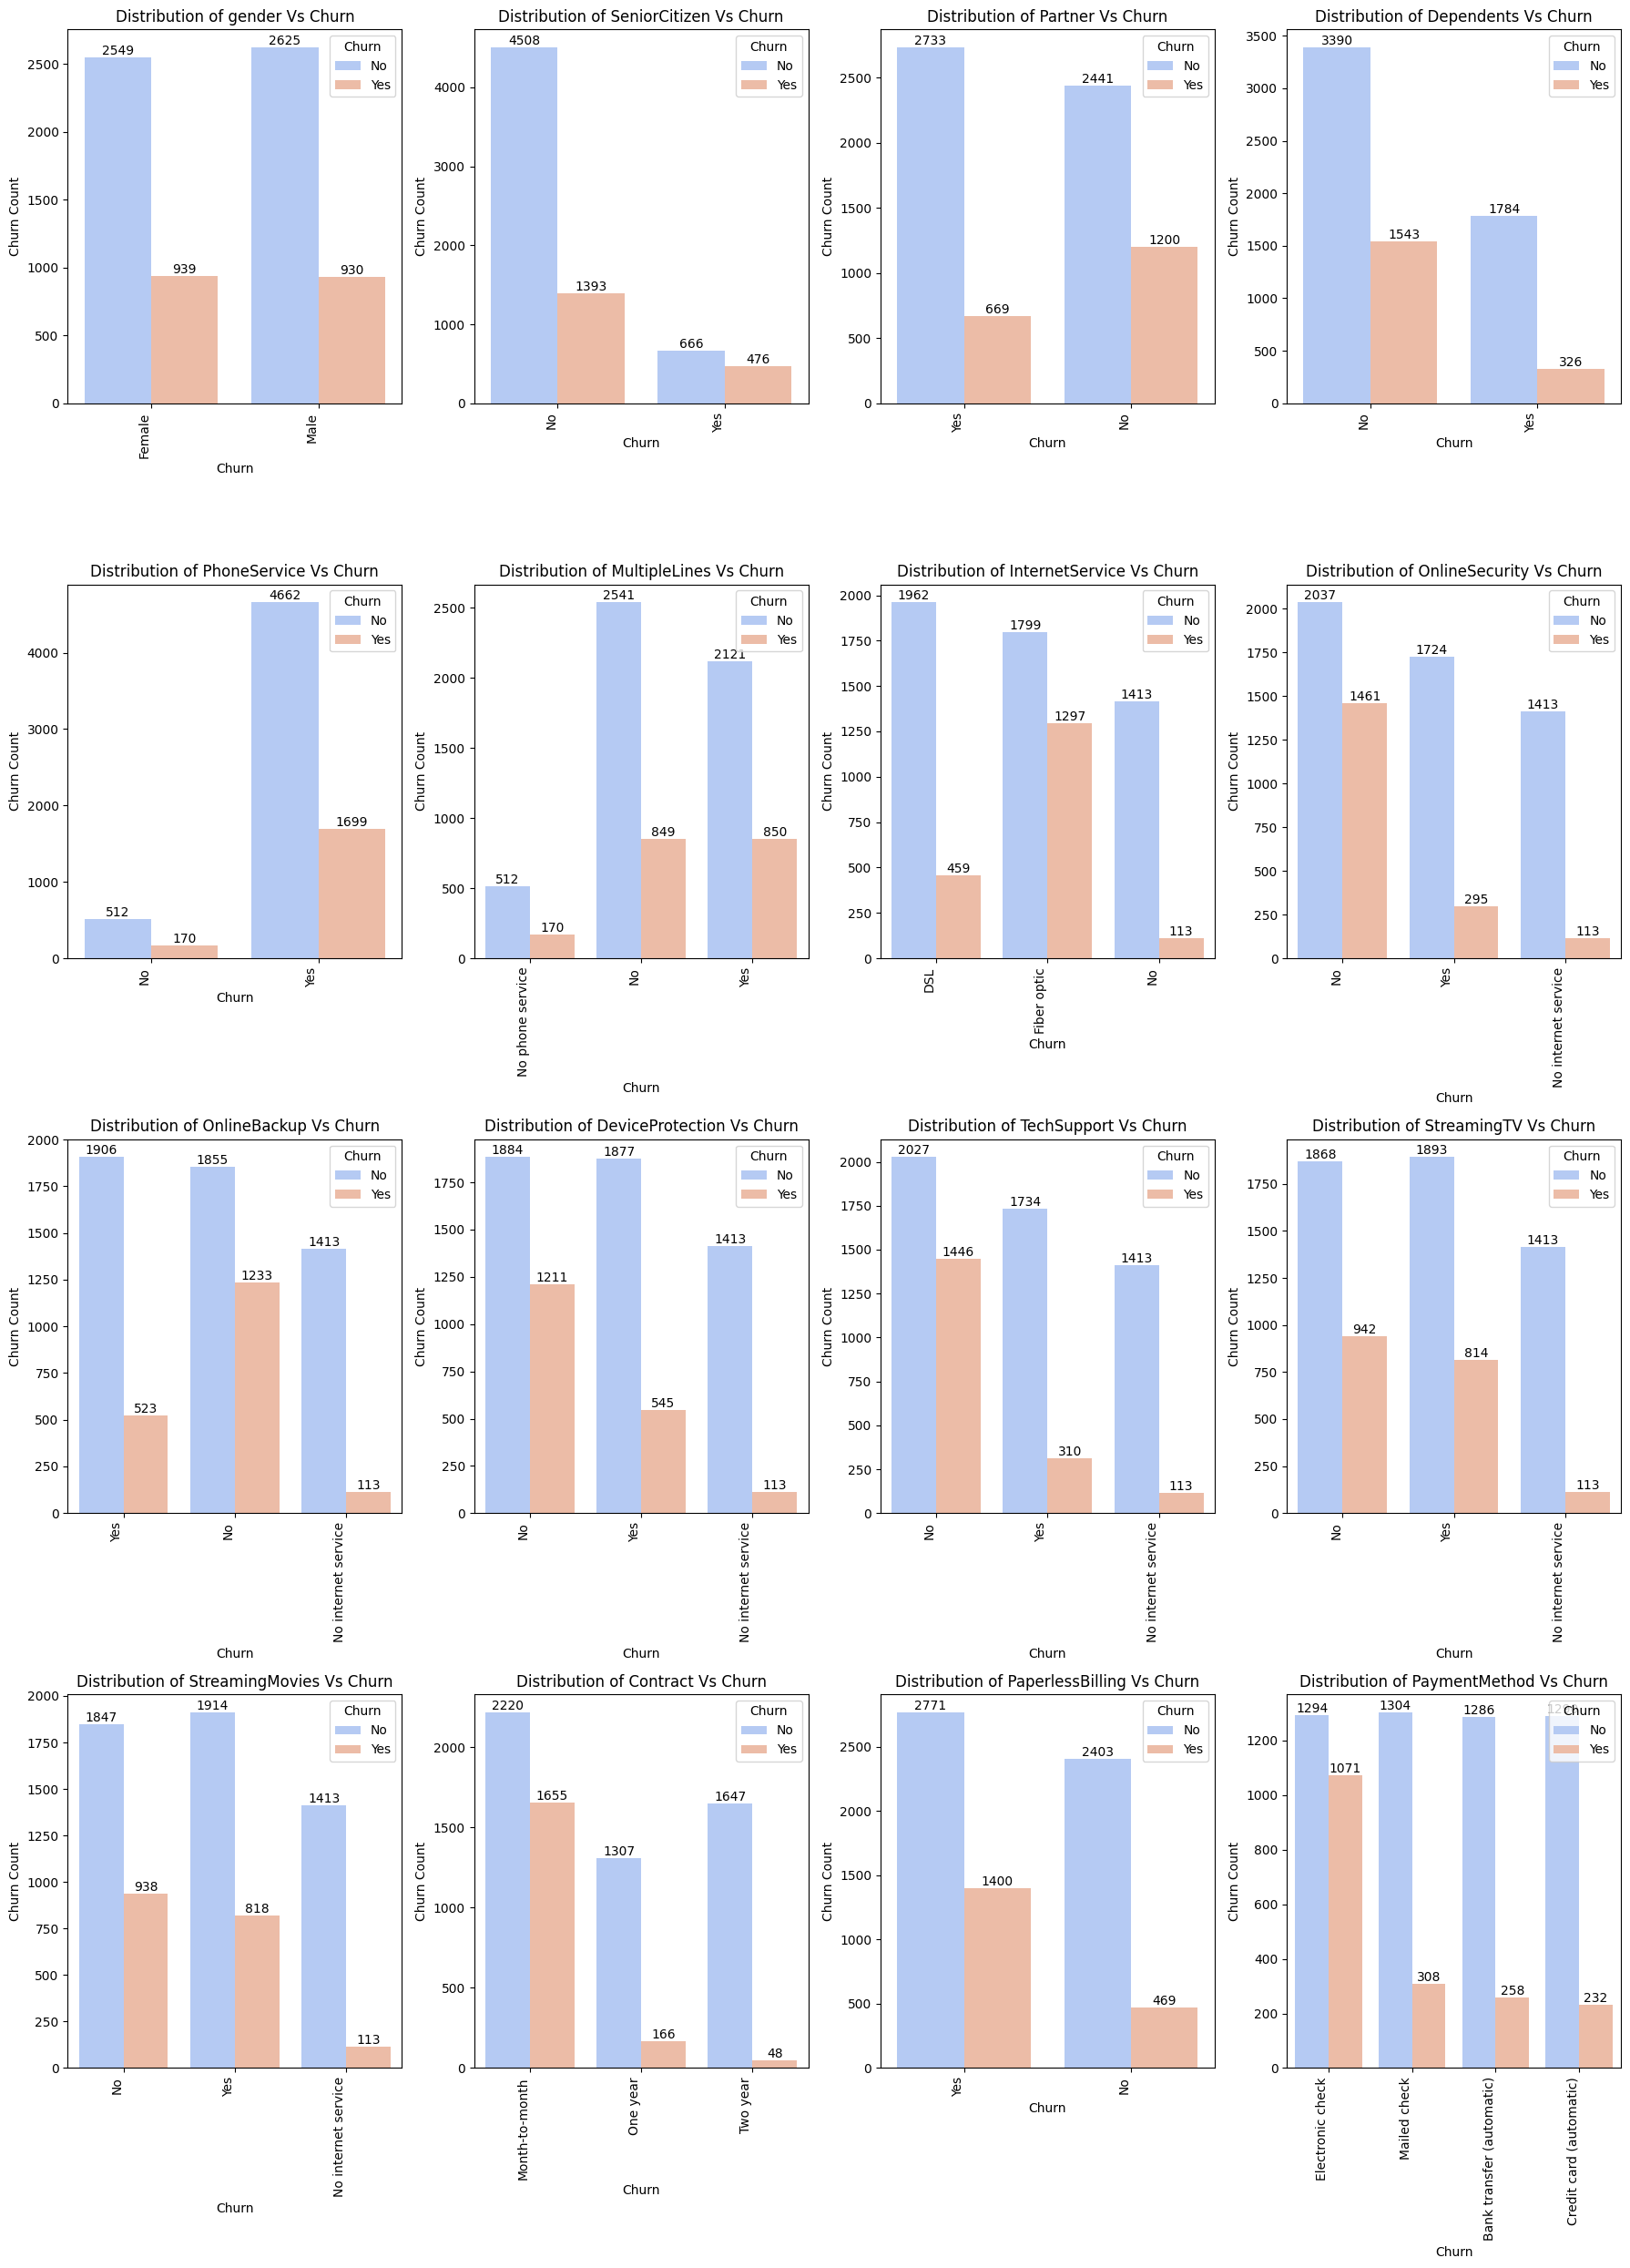

In [22]:
x=1

plt.figure(figsize=(18,25))
for col in category_column:
    plt.subplot(len(category_column)//4,len(category_column)//4, x )
    ax= sns.countplot(data=df, x=col, hue='Churn', palette='coolwarm')
    plt.xticks(rotation='vertical', ha= 'right')
    plt.title(f'Distribution of {col} Vs Churn')
    plt.xlabel('Churn')
    plt.ylabel('Churn Count')
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
    plt.tight_layout()
    x+=1

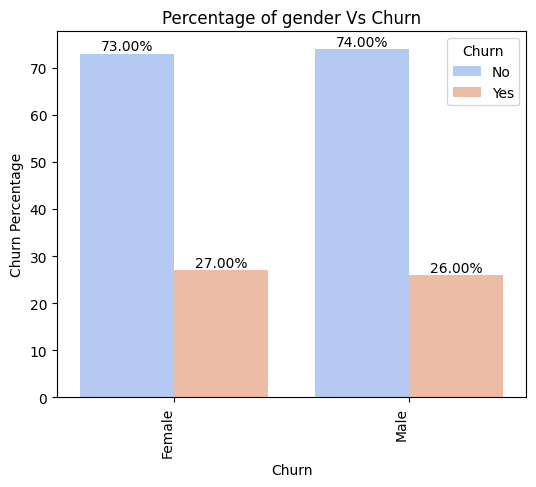

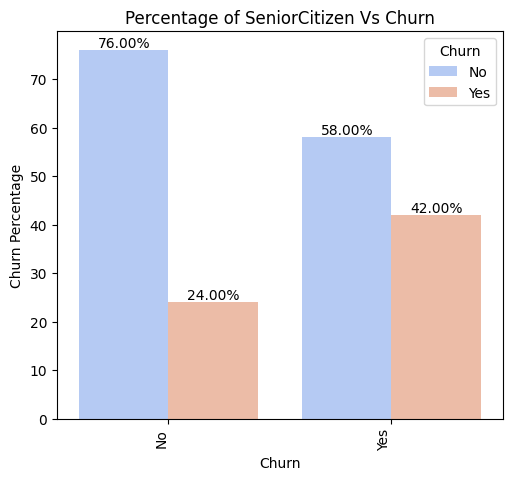

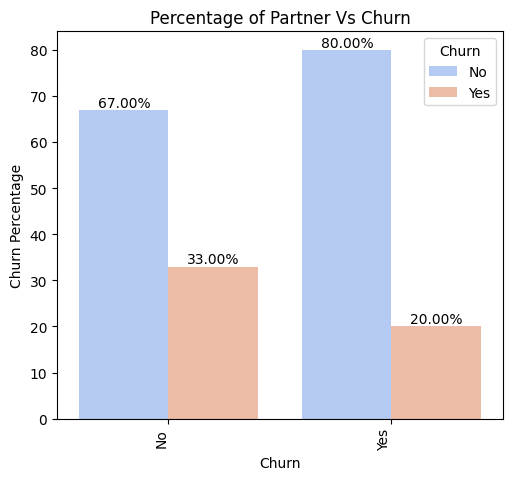

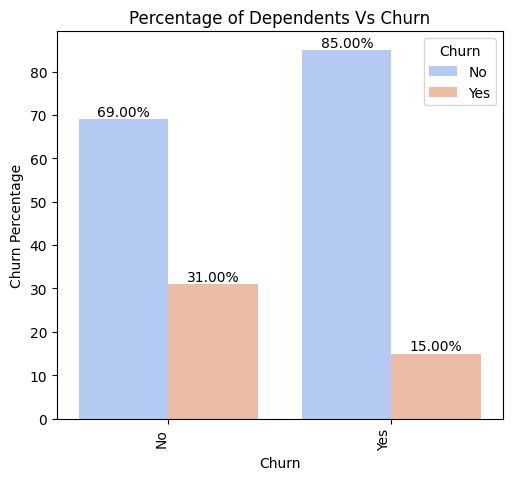

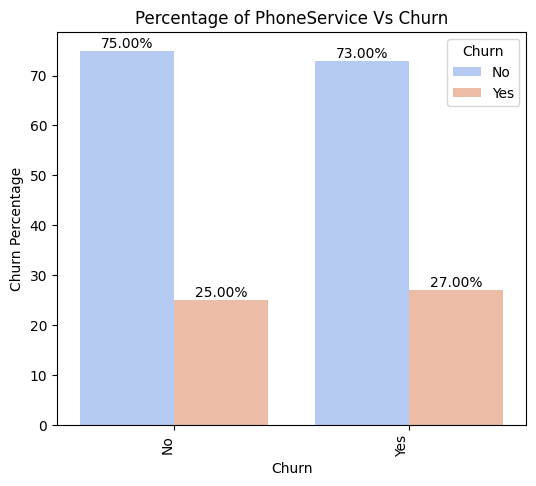

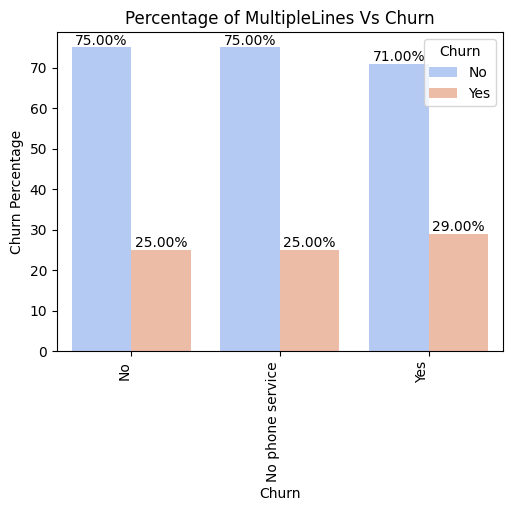

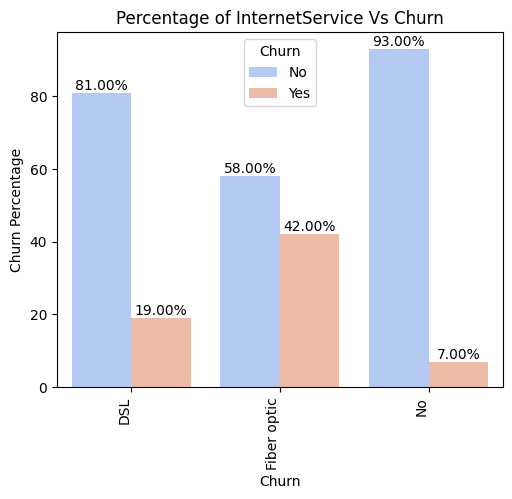

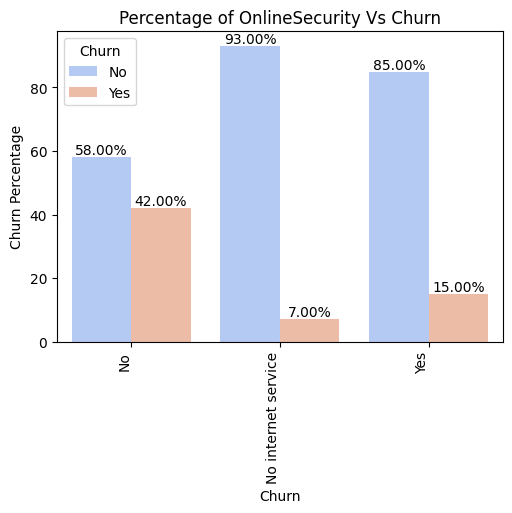

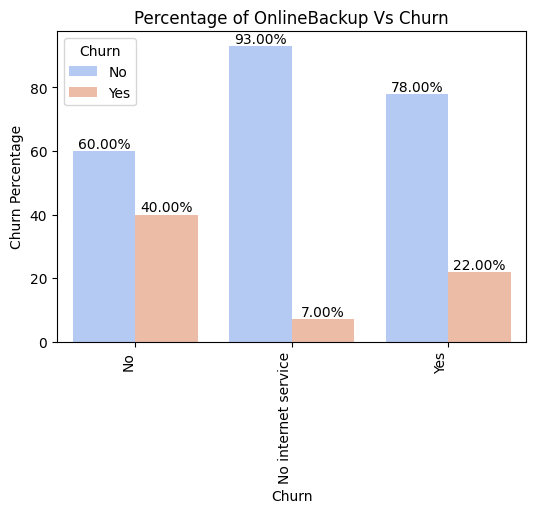

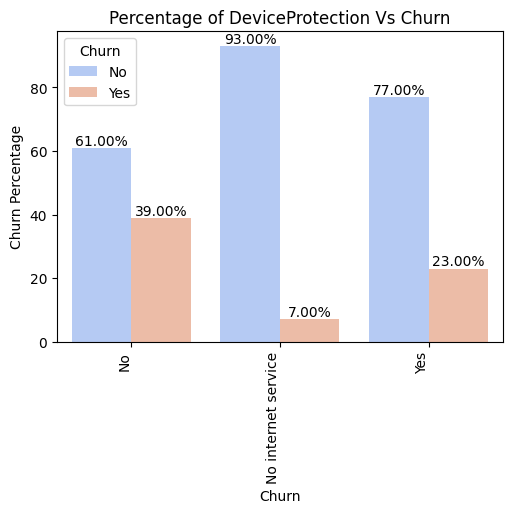

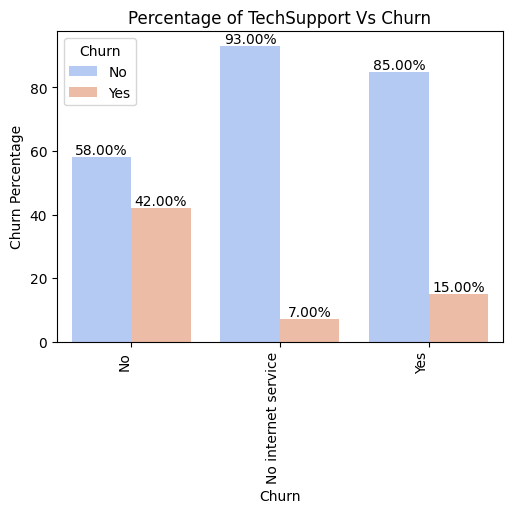

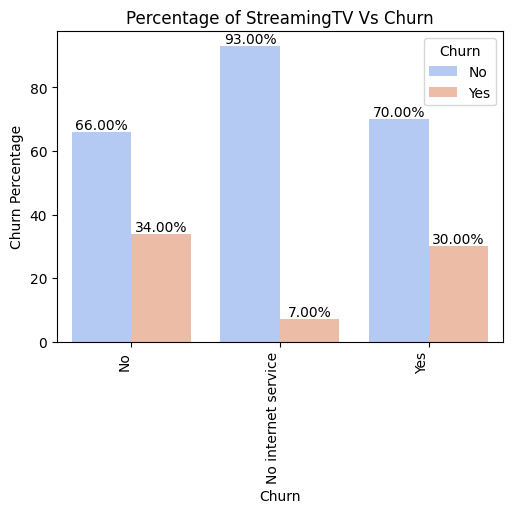

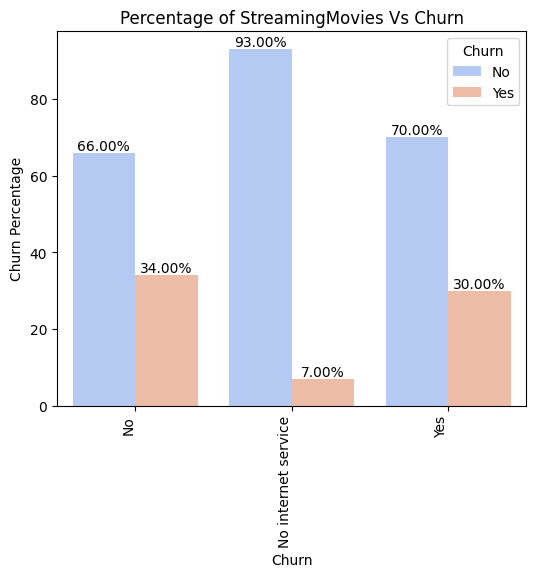

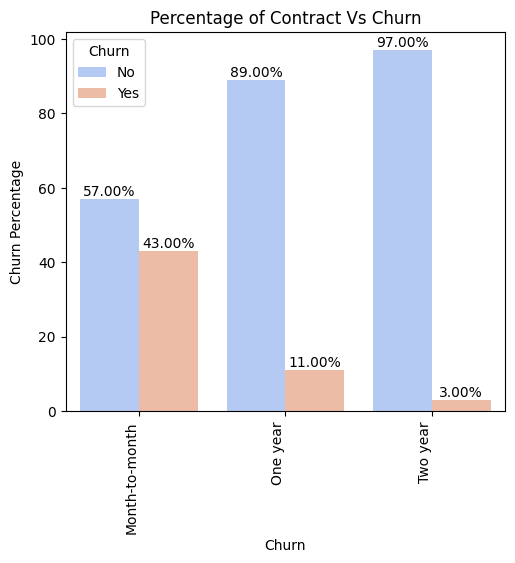

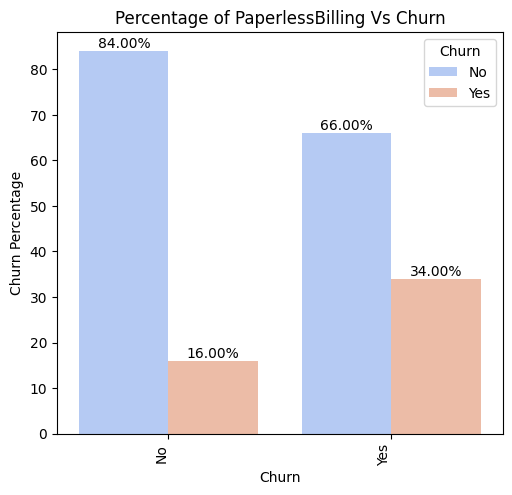

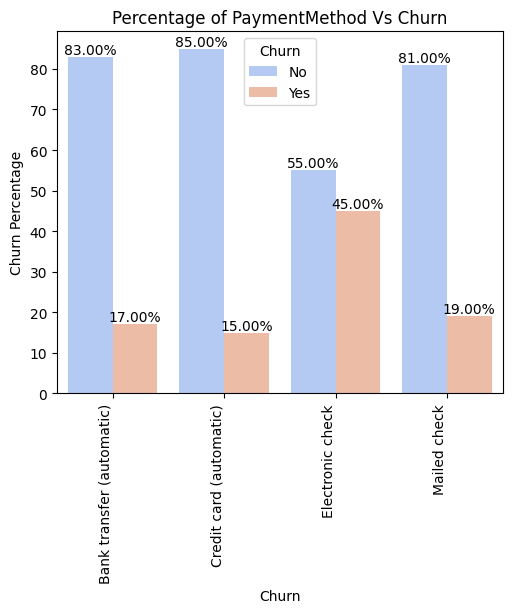

In [23]:
x=1

for col in category_column:
      plt.figure(figsize=(20,18))

# Calculate churn percentage and store it in 'churn_percent' DataFrame
      churn_percent = pd.crosstab(df[col], df['Churn'], normalize='index').round(2).mul(100)
      churn_percent =churn_percent.reset_index().melt(id_vars =col, value_name='Percentage')
      plt.subplot(len(category_column)//4,len(category_column)//4, x)
      ax=sns.barplot(data=churn_percent, x=col, y='Percentage', hue='Churn', palette='coolwarm')
      plt.xticks(rotation='vertical', ha= 'right')
      plt.title(f'Percentage of {col} Vs Churn')
      plt.xlabel('Churn')
      plt.ylabel('Churn Percentage')
      ax.bar_label(ax.containers[0], fmt='%.2f%%')
      ax.bar_label(ax.containers[1], fmt='%.2f%%')
      plt.tight_layout()
      plt.show()
      x+=1


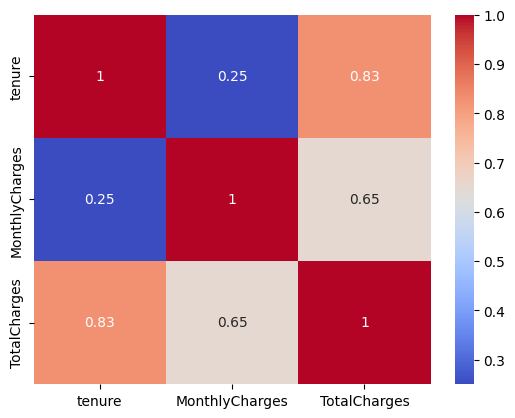

In [24]:
corr_matrix=df.select_dtypes(exclude='object').corr().round(2)
corr_matrix

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
# Feature Analysis/Engineering

In [25]:
df.drop(columns=['customerID'], inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151,Yes


In [26]:
df['TotalCharges'].replace(0, np.NaN, inplace=True)
df.isnull().sum()


,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [27]:
imputer= IterativeImputer()
df['TotalCharges']= imputer.fit_transform(df[['TotalCharges']])
df['TotalCharges'].isnull().sum()

0

In [28]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [29]:
numeric_columns =df.select_dtypes(include=['number']).columns.tolist()
unique_count =df.select_dtypes(include='object').nunique()
binary_columns= unique_count[unique_count==2].drop('Churn').index.tolist()
categorical_columns=unique_count[unique_count>2].index.tolist()

In [ ]:

#Split the dataframe into target variable and independent variables

In [30]:
x=df.drop(columns='Churn')
y=df['Churn']

In [ ]:
#Create a Transformation pipeline to transform a features for model

In [31]:
Transform =ColumnTransformer([('scaler', StandardScaler(), numeric_columns ),
                              ('ohe', OneHotEncoder(drop='first'), categorical_columns),
                              ('Binary_encoder', OrdinalEncoder(), binary_columns)], remainder='passthrough')

In [32]:
x_transform =Transform.fit_transform(x)
x_transform

array([[-1.27744458, -1.16032292, -0.99514045, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.06632742, -0.25962894, -0.17388914, ...,  0.        ,
         1.        ,  0.        ],
       [-1.23672422, -0.36266036, -0.96025934, ...,  0.        ,
         1.        ,  1.        ],
       ...,
       [-0.87024095, -1.1686319 , -0.8551745 , ...,  1.        ,
         0.        ,  1.        ],
       [-1.15528349,  0.32033821, -0.87283582, ...,  0.        ,
         1.        ,  1.        ],
       [ 1.36937906,  1.35896134,  2.01390667, ...,  0.        ,
         1.        ,  1.        ]])

In [33]:
Label_Encoder =LabelEncoder()
y_transform=Label_Encoder.fit_transform(y)
y_transform

array([0, 0, 1, ..., 0, 1, 0])

In [ ]:
#Add columns name to features data

In [34]:
columns = Transform.get_feature_names_out()
columns = list(map(lambda x: str(x).split("__")[-1], columns))
x_transform =pd.DataFrame(x_transform, columns = columns)
x_transform.head()

,tenure,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,...,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling
0,-1.277445,-1.160323,-0.995140,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.066327,-0.259629,-0.173889,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-1.236724,-0.362660,-0.960259,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
3,0.514251,-0.746535,-0.195524,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-1.236724,0.197365,-0.941273,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [ ]:
# Splitting Data for Model Traning & Testing

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x_transform.values, y_transform, random_state=42,
                                                    test_size=0.2, stratify=y)

print(f'Train feature shape: {x_train.shape}')
print(f'Test feature shape: {x_test.shape}')
print(f'Train label shape: {y_train.shape}')
print(f'Test Label shape: {y_test.shape}')

Train feature shape: (5634, 30)
Test feature shape: (1409, 30)
Train label shape: (5634,)
Test Label shape: (1409,)


In [ ]:
#Modelling Evaluation

In [37]:
def error_metrics(y_train, y_train_pred, y_test, y_test_pred):
    errors= {}
    errors['Accuracy_score_test'] = accuracy_score(y_test, y_test_pred)
    errors['Recall_score_test'] = recall_score(y_test, y_test_pred)
    errors['Precision_score_test'] = precision_score(y_test, y_test_pred)
    errors['F1_score_test'] = f1_score(y_test, y_test_pred)

    errors['Accuracy_score_train'] = accuracy_score(y_train, y_train_pred)
    errors['Recall_score_train'] = recall_score(y_train, y_train_pred)
    errors['Precision_score_train'] = precision_score(y_train, y_train_pred)
    errors['F1_score_train'] = f1_score(y_train, y_train_pred)

    return errors


In [38]:
def classification_curves(y_test, y_test_probs):
    #ROC Curve

    fpr, tpr, _ = roc_curve(y_test, y_test_pred)
    roc_auc = auc(fpr, tpr)

   #Precision- Recall Curve
    Precision, Recall, _ = precision_recall_curve(y_test, y_test_pred)
    average_precision= average_precision_score(y_test, y_test_pred)

   #plotting
    plt.figure(figsize=(10,5))


   #ROC Curve
    plt.subplot(1,2,1)
    plt.plot(fpr, tpr, color='darkorange', label='ROC Curve (area= %0.2f)' % roc_auc)
    plt.plot([0,1], [0,1], color='red', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Curve- ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

   #Precision- Recall Curve
    plt.subplot(1,2,2)
    plt.plot(Recall, Precision, color='green', label= 'average_precision = %0.2f' % average_precision)
    #plt.xlim([0.0, 1.0])
    #plt.ylim([0.0, 1.0])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower right')
    plt.show()

In [39]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)
y_test_probs =lr.predict_proba(x_test)[:,1]

error_lr= error_metrics(y_train, y_train_pred, y_test, y_test_pred)
error_lr

{'Accuracy_score_test': 0.8055358410220014,
 'Recall_score_test': 0.5588235294117647,
 'Precision_score_test': 0.6572327044025157,
 'F1_score_test': 0.6040462427745664,
 'Accuracy_score_train': 0.8054668086616968,
 'Recall_score_train': 0.5491638795986622,
 'Precision_score_train': 0.6604987932421561,
 'F1_score_train': 0.5997078159240321}


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.56      0.60       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409


Confusion Matrix:
[[926 109]
 [165 209]]


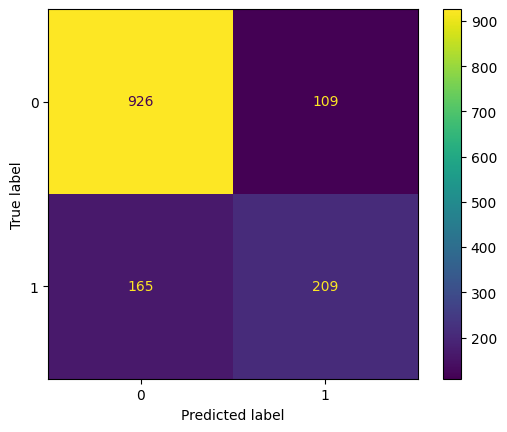

In [40]:
class_report = classification_report(y_test, y_test_pred)
print("\nClassification Report:")
print(class_report)

conf_matrix = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()

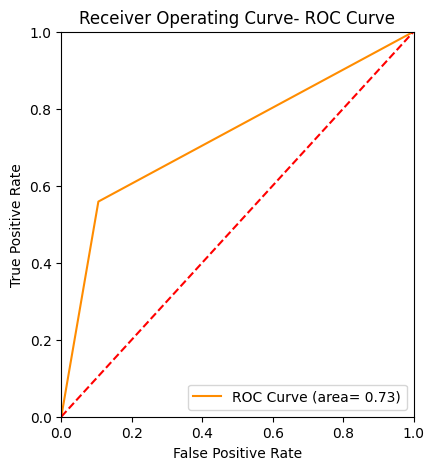

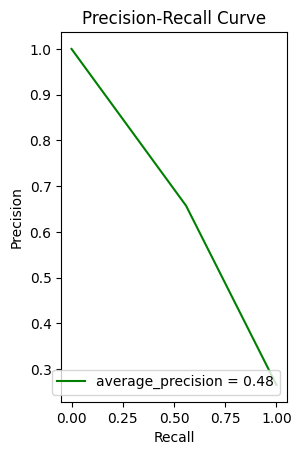

In [41]:
classification_curves(y_test, y_test_probs)

In [42]:
thresholds = np.arange(0.1, 1.0, 0.1)
y_train_probs = lr.predict_proba(x_train)[:, 1]
y_test_probs = lr.predict_proba(x_test)[:, 1]

f1_scores= []

for threshold in thresholds:
    y_test_pred = np.where(y_test_probs >= threshold, 1, 0)
    fi= f1_score(y_test, y_test_pred)
    f1_scores.append(fi)

In [43]:
threshold_df= pd.DataFrame({'thresholds': thresholds, 'f1_scores': f1_scores})
threshold_df

,thresholds,f1_scores
0,0.1,0.567763
1,0.2,0.604915
2,0.3,0.615721
3,0.4,0.615006
4,0.5,0.604046
5,0.6,0.514580
6,0.7,0.291845
7,0.8,0.051680
8,0.9,0.000000


In [45]:
# Random Forest classifier

In [44]:
rcf= RandomForestClassifier()
param_grid ={'n_estimators': [100, 200, 300, 400, 500],
             'criterion': ['gini', 'entropy'],
             'max_depth': [3, 5, 6, 8, 12, 14]}
Grid_search =GridSearchCV(rcf, param_grid=param_grid, cv=5, scoring='f1')
Grid_search.fit(x_train, y_train)

best_params=Grid_search.best_params_
best_score=Grid_search.best_score_

print(f'Best Parameters: {best_params}')
print(f'Best Score: {best_score}')



Best Parameters: {'criterion': 'entropy', 'max_depth': 12, 'n_estimators': 100}
Best Score: 0.5723435490372972


In [46]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(x_train, y_train)
y_train_pred = rfc.predict(x_train)
y_test_pred = rfc.predict(x_test)
y_test_probs = rfc.predict_proba(x_test)[:, 1]

error_rfc=error_metrics(y_train, y_train_pred, y_test, y_test_pred)
error_rfc

{'Accuracy_score_test': 0.78708303761533,
 'Recall_score_test': 0.4839572192513369,
 'Precision_score_test': 0.6284722222222222,
 'F1_score_test': 0.5468277945619335,
 'Accuracy_score_train': 0.9980475683351083,
 'Recall_score_train': 0.9953177257525083,
 'Precision_score_train': 0.9973190348525469,
 'F1_score_train': 0.9963173752929361}


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.63      0.48      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.77      0.79      0.78      1409


Confusion Matrix:
[[928 107]
 [193 181]]


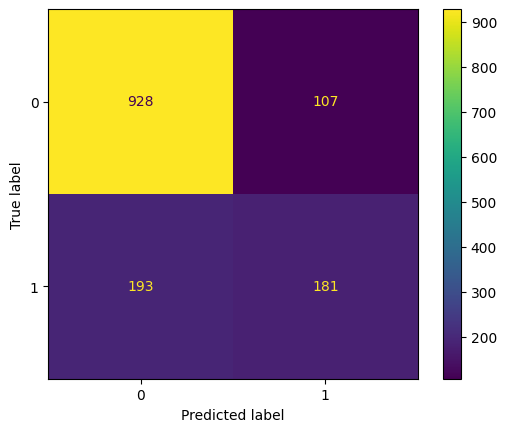

In [ ]:
class_report = classification_report(y_test, y_test_pred)
print("\nClassification Report:")
print(class_report)

conf_matrix = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()

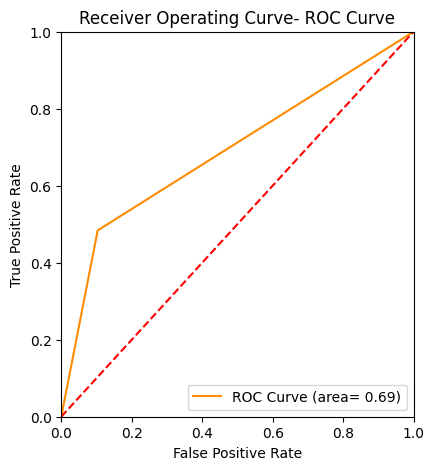

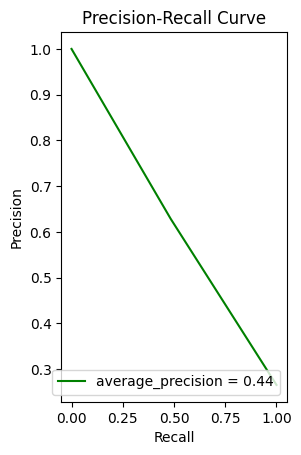

In [ ]:
classification_curves(y_test, y_test_probs)

In [47]:
thresholds_rfc = np.arange(0.1, 1.0, 0.1)
y_train_probs = lr.predict_proba(x_train)[:, 1]
y_test_probs = lr.predict_proba(x_test)[:, 1]

f1_scores_rfc= []

for threshold in thresholds_rfc:
    y_test_pred = np.where(y_test_probs >= threshold, 1, 0)
    fi= f1_score(y_test, y_test_pred)
    f1_scores_rfc.append(fi)

In [48]:
thresholds_rfc= pd.DataFrame({'thresholds': thresholds_rfc, 'f1_scores': f1_scores_rfc})
thresholds_rfc

,thresholds,f1_scores
0,0.1,0.567763
1,0.2,0.604915
2,0.3,0.615721
3,0.4,0.615006
4,0.5,0.604046
5,0.6,0.514580
6,0.7,0.291845
7,0.8,0.051680
8,0.9,0.000000


In [ ]:
#Neural Network--- Modelling

In [ ]:
#model = Sequential()
#model.add(Dense(64, activation='relu', input_shape=x_train.shape[1]))
#model.add(Dense(32, activation='relu'))
#model.add(Dense(1, activation='sigmoid'))

In [49]:
model = Sequential([(Dense(64, activation='relu', input_shape=(x_train.shape[1],))),
                    (Dropout(0.3)),
                    (Dense(32, activation='relu')),
                    (Dropout(0.3)),
                    (Dense(1, activation='sigmoid'))])


In [ ]:
#Model Compiling

In [51]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss=BinaryCrossentropy(),
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test))

#prediction on test
y_test_probs = model.predict(x_test)
# conversion of probabilities to binary prediction(threshold >0.5)

y_pred_prob=(y_test_probs >0.5).astype(int)

Epoch 1/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8346 - loss: 0.3618 - val_accuracy: 0.7757 - val_loss: 0.4570
Epoch 2/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8323 - loss: 0.3485 - val_accuracy: 0.7764 - val_loss: 0.4537
Epoch 3/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8391 - loss: 0.3468 - val_accuracy: 0.7771 - val_loss: 0.4608
Epoch 4/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8319 - loss: 0.3618 - val_accuracy: 0.7764 - val_loss: 0.4598
Epoch 5/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8352 - loss: 0.3555 - val_accuracy: 0.7814 - val_loss: 0.4664
Epoch 6/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8346 - loss: 0.3493 - val_accuracy: 0.7743 - val_loss: 0.4572
Epoch 7/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8352 - loss: 0.3488 - val_accuracy: 0.7750 - val_loss: 0.4563
Epoch 8/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8326 - loss: 0.3524 - val_accu

In [52]:
y_train_probs= model.predict(x_train)
y_train_pred=(y_train_probs > 0.5).astype(int)

error_n_n=error_metrics(y_train, y_train_pred, y_test, y_pred_prob)
error_n_n


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


{'Accuracy_score_test': 0.7757274662881476,
 'Recall_score_test': 0.4732620320855615,
 'Precision_score_test': 0.597972972972973,
 'F1_score_test': 0.5283582089552239,
 'Accuracy_score_train': 0.865814696485623,
 'Recall_score_train': 0.640133779264214,
 'Precision_score_train': 0.814468085106383,
 'F1_score_train': 0.7168539325842697}

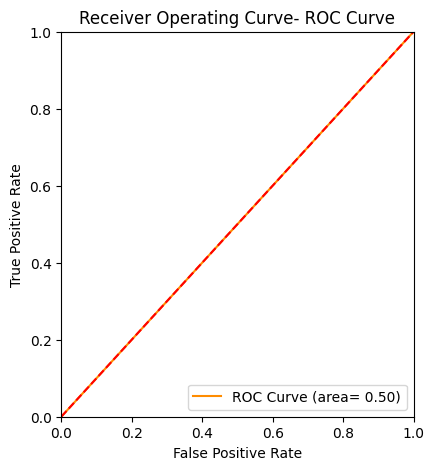

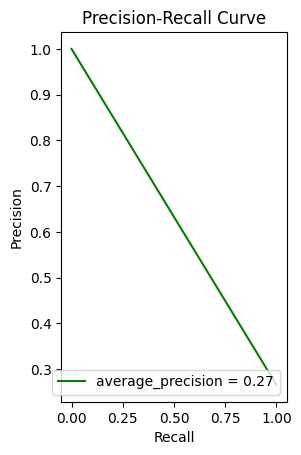

In [55]:
classification_curves(y_test, y_test_probs)

In [64]:
thresholds_n_n = np.arange(0.1, 1.0, 0.1)
y_train_probs = lr.predict_proba(x_train)[:, 1]
y_test_probs = lr.predict_proba(x_test)[:, 1]

y_test_probs = y_pred_prob
y_train_probs
f1_scores_n_n= []

for threshold in thresholds_n_n:
    y_test_pred = np.where(y_test_probs >= threshold, 1, 0)
    fi= f1_score(y_test, y_test_pred)
    f1_scores_n_n.append(fi)


In [65]:
threshold_df_nn =pd.DataFrame({'thresholds': thresholds_n_n, 'f1_scores': f1_scores_n_n})
threshold_df_nn

,thresholds,f1_scores
0,0.1,0.528358
1,0.2,0.528358
2,0.3,0.528358
3,0.4,0.528358
4,0.5,0.528358
5,0.6,0.528358
6,0.7,0.528358
7,0.8,0.528358
8,0.9,0.528358


In [66]:
precision, recall, thresholds = precision_recall_curve(y_test, y_test_probs)

# calculate the f1 score

f1_scores = 2 * (precision * recall) / (precision + recall)

# find the best threshold for f1 score

optimal_idx =np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

print(f'Optimal Threshold: {optimal_threshold}')
print(f'Optimal F1 Score: {f1_scores[optimal_idx]}')

Optimal Threshold: 1
Optimal F1 Score: 0.5283582089552238


In [67]:
y_train_probs = model.predict(x_train)
y_train_pred_2=(y_train_probs >=optimal_threshold).astype(int)

y_test_probs = model.predict(x_test)
y_test_pred_2=(y_test_probs >=optimal_threshold).astype(int)

error_n_n_2= error_metrics(y_train, y_train_pred_2, y_test, y_test_pred_2)
error_n_n_2

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


{'Accuracy_score_test': 0.7345635202271115,
 'Recall_score_test': 0.0,
 'Precision_score_test': 0.0,
 'F1_score_test': 0.0,
 'Accuracy_score_train': 0.7346467873624423,
 'Recall_score_train': 0.0,
 'Precision_score_train': 0.0,
 'F1_score_train': 0.0}